In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load coffee yield data
coffee_yield = pd.read_csv(r"C:\Users\marle\OneDrive\Documents\Coding\Coffee Time Series Analysis\Annual World Green Coffee Yield.csv")
print(coffee_yield.head())
print(coffee_yield.tail())
# Rename yield column
coffee_yield.rename(columns={'World Green Coffee Yield (kg/ha)': 'Yield'}, inplace = True)
print(coffee_yield.head())
# Summary statistics
print('\n***Yield Summary Statistics***')
print(coffee_yield['Yield'].describe())

'''
There is significant variation in world green coffee yield data.
The most productive year (930.8kg/ha) yielded more than twice the coffee of the least productive year (384.1kg/ha) per hectare.
'''

# Load robusta prices
robusta_prices = pd.read_csv(r"C:\Users\marle\OneDrive\Documents\Coding\Coffee Time Series Analysis\PCOFFROBUSDM.csv")
print(robusta_prices.head())
print(robusta_prices.tail())

# Load other mild prices
other_mild_prices = pd.read_csv(r"C:\Users\marle\OneDrive\Documents\Coding\Coffee Time Series Analysis\PCOFFOTMUSDM.csv")
print(other_mild_prices.head())
print(other_mild_prices.tail())

# Trim all series to start in 1990 and end in 2022 (full periods common to all series)
yield_1990 = coffee_yield.tail(len(coffee_yield['Yield']) - 29)
print(yield_1990.head())
robusta_2022 = robusta_prices.head(len(robusta_prices) - 21)
print(robusta_2022.tail())
other_mild_2022 = other_mild_prices.head(len(other_mild_prices) - 21)
print(other_mild_2022.tail())

# Create time index to plot annual and monthly series together
robusta_2022.loc[:, 'DATE'] = pd.to_datetime(robusta_2022['DATE'])
robusta_2022.set_index('DATE', inplace=True)
other_mild_2022.loc[:, 'DATE'] = pd.to_datetime(other_mild_2022['DATE'])
other_mild_2022.set_index('DATE', inplace=True)

if yield_1990['Year'].dtype != 'datetime64[ns]':
    yield_1990.loc[:, 'Year'] = pd.to_datetime(yield_1990['Year'], format='%Y')
# Create copy to avoid SettingWithCopyWarning
interpolated_yield = yield_1990.copy()
interpolated_yield.set_index('Year', inplace=True)
interpolated_yield = interpolated_yield.resample('MS').interpolate(method='linear')
interpolated_yield = interpolated_yield.infer_objects()
print(interpolated_yield.head())

   Year  World Green Coffee Yield (kg/ha)
0  1961                             464.0
1  1962                             443.2
2  1963                             401.6
3  1964                             384.1
4  1965                             509.5
    Year  World Green Coffee Yield (kg/ha)
57  2018                             922.8
58  2019                             862.7
59  2020                             930.8
60  2021                             832.6
61  2022                             883.4
   Year  Yield
0  1961  464.0
1  1962  443.2
2  1963  401.6
3  1964  384.1
4  1965  509.5

***Yield Summary Statistics***
count     62.000000
mean     625.317742
std      157.119211
min      384.100000
25%      504.450000
50%      577.200000
75%      759.075000
max      930.800000
Name: Yield, dtype: float64
         DATE  PCOFFROBUSDM
0  1990-01-01     50.520000
1  1990-02-01     51.299999
2  1990-03-01     57.680000
3  1990-04-01     57.389999
4  1990-05-01     55.029999
           D

C:\Users\marle\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
C:\Users\marle\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
C:\Users\marle\AppData\Local\Temp\ipykernel_37416\386029820.py:46: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['1990-01-01 00:00:00', '1991-01-01 00:00:00', '1992-01-01 00:00:00',
 '1993-01-01 00:00:00', '1994-01-01 00:00:00', 

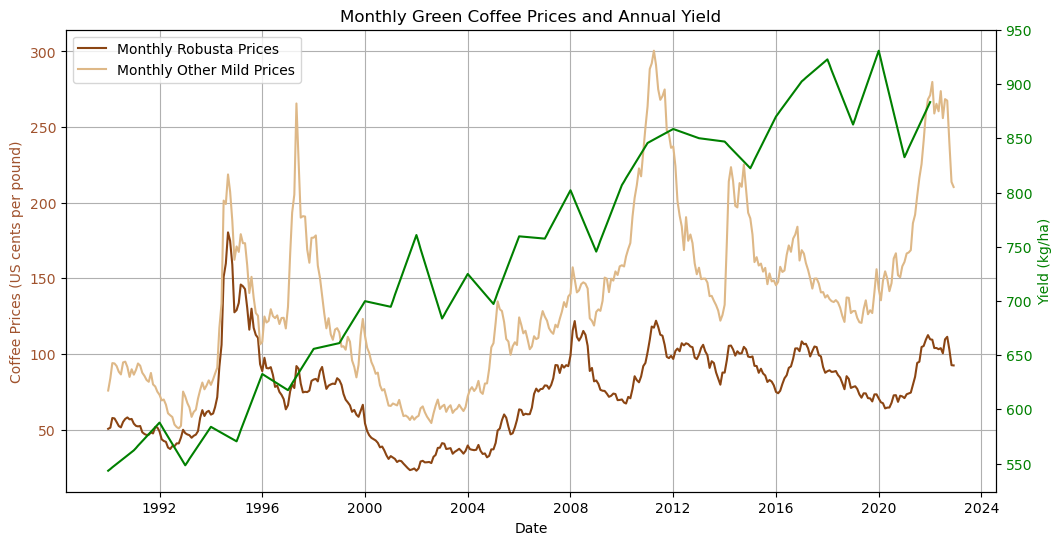

In [7]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot monthly robusta prices on the left y-axis
ax1.plot(robusta_2022.index, robusta_2022['PCOFFROBUSDM'], label='Monthly Robusta Prices', color='saddlebrown')
ax1.plot(other_mild_2022.index, other_mild_2022['PCOFFOTMUSDM'], label='Monthly Other Mild Prices', color='burlywood')
ax1.set_xlabel('Date')
ax1.set_ylabel('Coffee Prices (US cents per pound)', color='sienna')
ax1.tick_params(axis='y', labelcolor='sienna')
ax1.legend(loc='upper left')

# Create a second y-axis for the yield
ax2 = ax1.twinx()
ax2.plot(interpolated_yield.index, interpolated_yield['Yield'], label='Annual Yield', color='green')
ax2.set_ylabel('Yield (kg/ha)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Formatting the plot
plt.title('Monthly Green Coffee Prices and Annual Yield')
ax1.grid()
plt.show()
fig.savefig(r'C:\Users\marle\OneDrive\Documents\Coding\Coffee Time Series Analysis\Monthly Green Coffee Prices and Annual Yield.png')

In [9]:
Coffee yields have steadily increased over the last 30 years, likely due to improved agricultural practices and increased professionalisation of the industry.
Holding demand constant, we might expect long term increases in yield (hinting at increased supply) to result in a fall in prices.
Here we see that despite significant increases in yield (from around 550kg/ha to 900kg/ha) prices have largely not trended downwards.

SyntaxError: invalid decimal literal (2781551425.py, line 3)

In [11]:
# Pearson's Rank Correlation Coefficient
from scipy.stats import pearsonr

'''
It would be problematic to investigate the correlation between the linear monthly interpolated values of annual yield data and monthly coffee prices.
So the next step is to calculate annual mean prices for robusta and other mild beans to calculate the correlation with the yield data.
'''

#robusta_prices is annual
annual_robusta = robusta_2022.resample('YE').mean()
annual_other_mild = other_mild_2022.resample('YE').mean()
print(annual_robusta.head())
print(annual_robusta.tail())
print(annual_other_mild.head())
print(annual_other_mild.tail())
print(len(annual_robusta) == len(annual_other_mild) == len(yield_1990))

print('\nRobusta Correlations')
robusta_yield_corr, robusta_yield_p_value = pearsonr(yield_1990['Yield'], annual_robusta['PCOFFROBUSDM'])
print(f'Yield Pearson correlation: {robusta_yield_corr} P-value: {robusta_yield_p_value}')

print('\nOther Mild Correlations')
other_mild_yield_corr, other_mild_yield_p_value = pearsonr(yield_1990['Yield'], annual_other_mild['PCOFFOTMUSDM'])
print(f'Yield Pearson correlation: {other_mild_yield_corr} P-value: {other_mild_yield_p_value}')

'''
The low p-value for the correlation test between annual mean other mild bean prices and yield data suggests that we can reject the null hypothesis that the two series are not correlated.
The other mild test is significant at the 1% level.
The correlation test between robusta prices and coffee yield data is less statistically significant.
'''

            PCOFFROBUSDM
DATE                    
1990-12-31     54.986667
1991-12-31     49.832604
1992-12-31     42.223967
1993-12-31     52.554660
1994-12-31    117.240049
            PCOFFROBUSDM
DATE                    
2018-12-31     84.774638
2019-12-31     73.565376
2020-12-31     68.755699
2021-12-31     89.824322
2022-12-31    103.629802
            PCOFFOTMUSDM
DATE                    
1990-12-31     89.147504
1991-12-31     85.027028
1992-12-31     61.737390
1993-12-31     71.118638
1994-12-31    147.348975
            PCOFFOTMUSDM
DATE                    
2018-12-31    132.714927
2019-12-31    130.555761
2020-12-31    150.831950
2021-12-31    204.694029
2022-12-31    255.465902
True

Robusta Correlations
Yield Pearson correlation: 0.3417500234556675 P-value: 0.05158670988361328

Other Mild Correlations
Yield Pearson correlation: 0.5366348743953153 P-value: 0.001284017343178302


'\nThe low p-value for the correlation test between annual mean other mild bean prices and yield data suggests that we can reject the null hypothesis that the two series are not correlated.\nThe other mild test is significant at the 1% level.\nThe correlation test between robusta prices and coffee yield data is less statistically significant.\n'

In [13]:
# Granger causality tests
from statsmodels.tsa.stattools import grangercausalitytests

# grangercausalitytests requires both series to be in the same dataframe: merge based on year
yield_1990.loc[:, 'Year'] = pd.to_datetime(yield_1990['Year'])
yield_1990.loc[:, 'Year_only'] = yield_1990['Year'].dt.year
print(annual_other_mild)
# Convert 'Year' to datetime and extract the year
annual_other_mild = annual_other_mild.reset_index().rename(columns={'DATE': 'Year'})
annual_robusta = annual_robusta.reset_index().rename(columns={'DATE': 'Year'})
annual_other_mild.loc[:, 'Year'] = pd.to_datetime(annual_other_mild['Year'])
annual_other_mild.loc[:, 'Year_only'] = annual_other_mild['Year'].dt.year
annual_robusta.loc[:, 'Year'] = pd.to_datetime(annual_robusta['Year'])
annual_robusta.loc[:, 'Year_only'] = annual_robusta['Year'].dt.year

combined_df = pd.merge(yield_1990[['Year_only', 'Yield']], annual_other_mild[['Year_only', 'PCOFFOTMUSDM']], on='Year_only', how='inner')
combined_df = pd.merge(combined_df, annual_robusta[['Year_only', 'PCOFFROBUSDM']], on='Year_only', how='inner')

# Display the combined DataFrame
print(combined_df)

# Annual data so let's set the maximum lag to 2 years (to capture plant maturity/acreage dynamics)
print(yield_1990)
max_lag = 2
print('\n*Robusta Lag Granger Causality Tests*')
grangercausalitytests(combined_df[['PCOFFROBUSDM', 'Yield']], maxlag=max_lag)
print('\n*Other Mild Lag Granger Causality Tests*')
grangercausalitytests(combined_df[['PCOFFOTMUSDM',  'Yield']], maxlag=max_lag)

            PCOFFOTMUSDM
DATE                    
1990-12-31     89.147504
1991-12-31     85.027028
1992-12-31     61.737390
1993-12-31     71.118638
1994-12-31    147.348975
1995-12-31    150.833404
1996-12-31    121.972004
1997-12-31    188.928111
1998-12-31    135.469270
1999-12-31    103.884424
2000-12-31     87.204110
2001-12-31     62.284133
2002-12-31     61.462068
2003-12-31     64.172862
2004-12-31     80.479525
2005-12-31    114.853919
2006-12-31    114.408858
2007-12-31    123.613878
2008-12-31    139.712466
2009-12-31    143.754758
2010-12-31    196.049092
2011-12-31    271.108058
2012-12-31    186.441583
2013-12-31    139.484337
2014-12-31    200.355896
2015-12-31    159.903686
2016-12-31    163.839985
2017-12-31    150.755953
2018-12-31    132.714927
2019-12-31    130.555761
2020-12-31    150.831950
2021-12-31    204.694029
2022-12-31    255.465902
    Year_only  Yield  PCOFFOTMUSDM  PCOFFROBUSDM
0        1990  543.4     89.147504     54.986667
1        1991  562.2     85

C:\Users\marle\AppData\Local\Temp\ipykernel_37416\1541910930.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yield_1990.loc[:, 'Year_only'] = yield_1990['Year'].dt.year


{1: ({'ssr_ftest': (1.239416071765678, 0.274726646593937, 29.0, 1),
   'ssr_chi2test': (1.3676315274655757, 0.24221923720834418, 1),
   'lrtest': (1.3392131629540245, 0.24717277617215813, 1),
   'params_ftest': (1.2394160717656835, 0.2747266465939361, 29.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.0830890059601013, 0.35333817958213715, 26.0, 2),
   'ssr_chi2test': (2.5827507065202413, 0.2748924487521343, 2),
   'lrtest': (2.4807861238484747, 0.28927049437316954, 2),
   'params_ftest': (1.0830890059600964, 0.3533381795821388, 26.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}


***ADF stationarity test***
ADF (constant only) test of yield data
ADF test statistic: -2.1306749487379033 P-value: 0.2323602408462218
(-2.1306749487379033, 0.2323602408462218, 5, 27, {'1%': -3.6996079738860943, '5%': -2.9764303469999494, '10%': -2.627601001371742}, 224.1993421490394)

***ADF trend-stationarity test***
ADF (constant + trend only) test of coffee yield data
ADF test statistic: 1.0164152164505922 P-value: 1.0
(1.0164152164505922, 1.0, 9, 23, {'1%': -4.417148310183283, '5%': -3.6221875096572695, '10%': -3.248726452699926}, 222.6150316637682)
The ADF test suggests we should not reject the null hypothesis that coffee production is not trend-stationary.

KPSS (constant + trend only) test of coffee yield differences
KPSS (constant + trend) test statistic: 0.13492212069270587 P-value: 0.07051459130980393
(0.13492212069270587, 0.07051459130980393, 2, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})
The KPSS test suggests we should reject the null hypothesis that coffee 

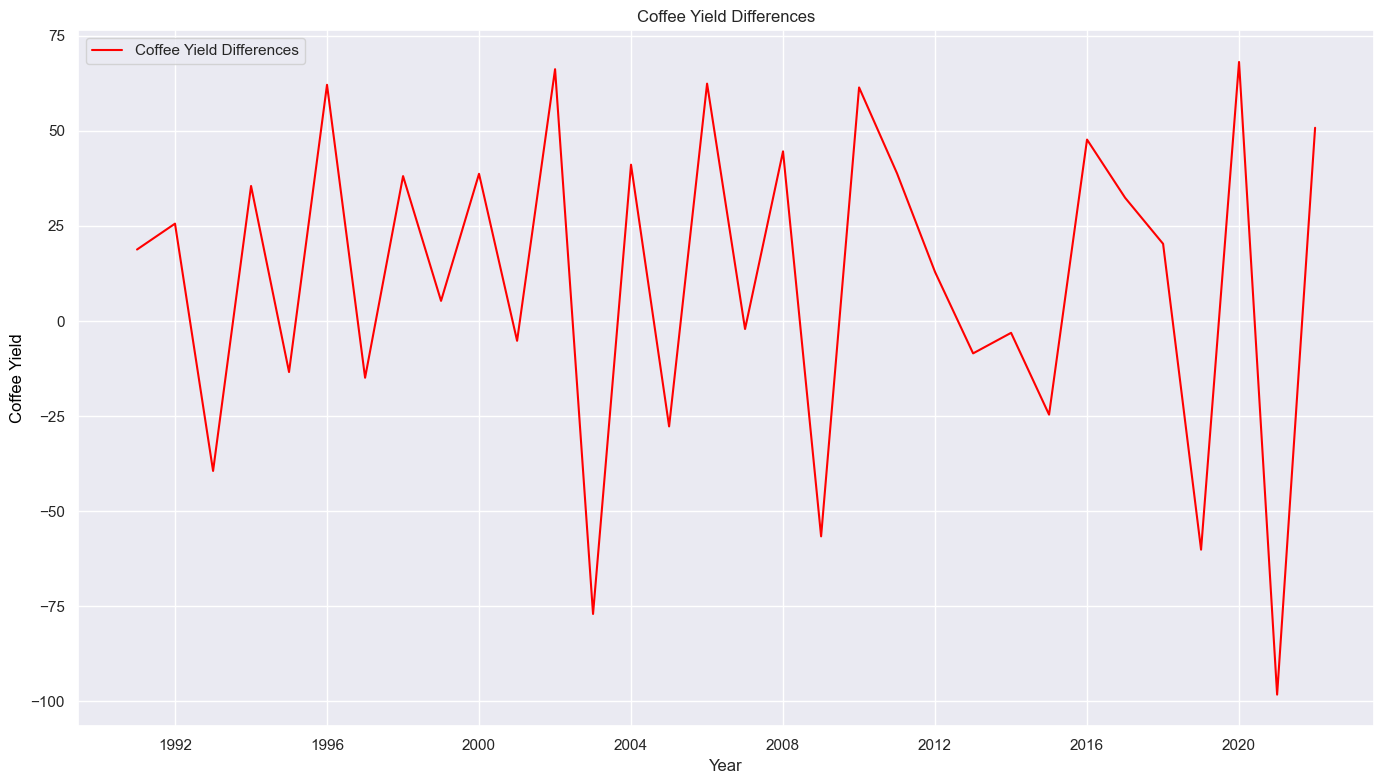

ADF test statistic: -11.624569647731674 P-value: 2.340413245939379e-21
(-11.624569647731674, 2.340413245939379e-21, 0, 31, {'1%': -3.661428725118324, '5%': -2.960525341210433, '10%': -2.6193188033298647}, 215.83282610868372)

KPSS (constant only) test of coffee yield differences
KPSS (constant-only) test statistic: 0.1470901047357946 P-value: 0.1
(0.1470901047357946, 0.1, 3, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


C:\Users\marle\AppData\Local\Temp\ipykernel_37416\2157549375.py:46: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(x = yield_1990['Yield_diff'].dropna(), regression = "c")


'\nAccording to the ADF test, we should reject the null hypothesis in favour of the alternative hypothesis that differenced yield is a stationary series at the 5% significance level.\nAccording to the KPSS test, we cannot reject the null hypothesis that differenced yield is a stationary time series.\nSo we should treat differenced yield as stationary.\n'

In [25]:
# Stationarity Analysis
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

# ADF stationarity test
# The null hypothesis is that there is a unit root. The alternative hypothesis that there is no unit root (stationary).
print('\n***ADF stationarity test***')
print('ADF (constant only) test of yield data')
result = adfuller(yield_1990['Yield'], regression = "c")
print(f'ADF test statistic: {result[0]} P-value: {result[1]}')
print(result)


# Is coffee production trend-stationary?
print('\n***ADF trend-stationarity test***')
print('ADF (constant + trend only) test of coffee yield data')
result = adfuller(yield_1990['Yield'], regression = "ct")
print(f'ADF test statistic: {result[0]} P-value: {result[1]}')
print(result)
print('The ADF test suggests we should not reject the null hypothesis that coffee production is not trend-stationary.')
print('\nKPSS (constant + trend only) test of coffee yield differences')
result = kpss(x = yield_1990['Yield'].dropna(), regression = "ct")
print(f'KPSS (constant + trend) test statistic: {result[0]} P-value: {result[1]}')
print(result)
print('The KPSS test suggests we should reject the null hypothesis that coffee production is trend-stationary at the 10% significance level.')

# Is differenced production stationary?
print("\nChange in Coffee Yield")
yield_1990.loc[:, 'Yield_diff'] = yield_1990['Yield'] - yield_1990['Yield'].shift()
print(yield_1990)
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='Yield_diff', data=yield_1990, label='Coffee Yield Differences', color='red')
plt.title('Coffee Yield Differences')
plt.xlabel('Year')
plt.ylabel('Coffee Yield', color='black')
sns.set_theme()
plt.tight_layout()
plt.savefig(r'C:\Users\marle\OneDrive\Documents\Coding\Coffee Time Series Analysis\Coffee Yield Differences.png')
plt.show()

# Ensure the NA from differencing is removed before the ADF test
result = adfuller(yield_1990['Yield_diff'].dropna(), regression = "c")
print(f'ADF test statistic: {result[0]} P-value: {result[1]}')
print(result)
print('\nKPSS (constant only) test of coffee yield differences')
result = kpss(x = yield_1990['Yield_diff'].dropna(), regression = "c")
print(f'KPSS (constant-only) test statistic: {result[0]} P-value: {result[1]}')
print(result)

'''
According to the ADF test, we should reject the null hypothesis in favour of the alternative hypothesis that differenced yield is a stationary series at the 5% significance level.
According to the KPSS test, we cannot reject the null hypothesis that differenced yield is a stationary time series.
So we should treat differenced yield as stationary.
'''
